In [ ]:
For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  

In [15]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [16]:
/anaconda3/bin/python-m pip install wordcloud

NameError: name 'anaconda3' is not defined

In [17]:
conda install -c conda-forge wordcloud=1.6.0

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install SpaCy

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas
df=pd.read_csv("Elon_musk2.csv",error_bad_lines=False)
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [21]:
pd.read_csv("Elon_musk2.csv", index_col=[0])

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [22]:
df.rename(columns={'Text':'x'})

,Unnamed: 0,x
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [23]:
df1 = pd.read_csv("Elon_musk2.csv", index_col=[0])

In [24]:
df1

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [25]:
df2 = df1.rename(columns={'Text':'x'})

In [26]:
df2

,x
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [27]:
book = [x.strip() for x in df2.x] # remove both the leading and the trailing characters
 # removes empty strings, because they are considered in Python as False

In [28]:
book

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [29]:
book2 = [x for x in book if x]

In [30]:
book2

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [31]:
text = ' '.join(book2)
text 

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [32]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [33]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox']


In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sadhanasrinivasan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
"tokenizers"/"punkt"/PY3/english.pickle

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [36]:
len(text_tokens)

21785

In [37]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I', '’', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sadhanasrinivasan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadhanasrinivasan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution']


In [39]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [41]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [40]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install spacy==2.3.5

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

     |████████████████████████████████| 12.0 MB 175 kB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047106 sha256=9b13ba9bbe23677734bdadbd661380e639abaab33d9d51c75d0d80791b6227ff
  Stored in directory: /Users/sadhanasrinivasan/Library/Caches/pip/wheels/ee/4d/f7/563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pyresparser

     |████████████████████████████████| 4.2 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 21.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import spacy

In [42]:
nlp = spacy.load('en_core_web_sm')

In [43]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I ’ alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would


In [44]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', '-PRON-', "'", 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution']


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [46]:
print(vectorizer.vocabulary_)

{'kunalb11': 2703, 'pron': 3535, 'alien': 233, 'idaacarmack': 2444, 'ray': 3615, 'trace': 4488, 'cyberpunk': 968, 'hdr': 1682, 'nextlevel': 3151, 'have': 1676, 'try': 4522, 'joerogan': 2623, 'spotify': 4107, 'great': 1615, 'interview': 2555, 'gtera27': 1634, 'doge': 1120, 'underestimate': 4656, 'teslacn': 4335, 'congratulations': 861, 'tesla': 4329, 'china': 745, 'amazing': 258, 'execution': 1329, 'last': 2723, 'year': 4928, 'now': 3189, 'next': 3150, 'even': 1301, 'happy': 1663, 'new': 3147, 'ox': 3304, 'httpstco9wfkmyu2oj': 1869, 'frodo': 1497, 'underdoge': 4655, 'all': 236, 'thought': 4412, 'would': 4904, 'fail': 1365, 'httpstcozgxjfdzzrm': 2402, 'owensparks': 3301, 'flcnhvy': 1439, 'anonyx10': 287, 'haha': 1649, 'thank': 4372, 'indeed': 2493, 'tweets': 4546, 'definitely': 1022, 'represent': 3698, 'realworld': 3640, 'time': 4431, 'allocation': 238, 'the': 4380, 'entertaining': 1257, 'outcome': 3281, 'likely': 2783, 'givedirectly': 1582, 'just': 2651, 'send': 3882, 'agree': 202, 'clu

In [47]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
print(X.toarray().shape) 

(16611, 4958)


In [49]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book) 

In [50]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

In [52]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

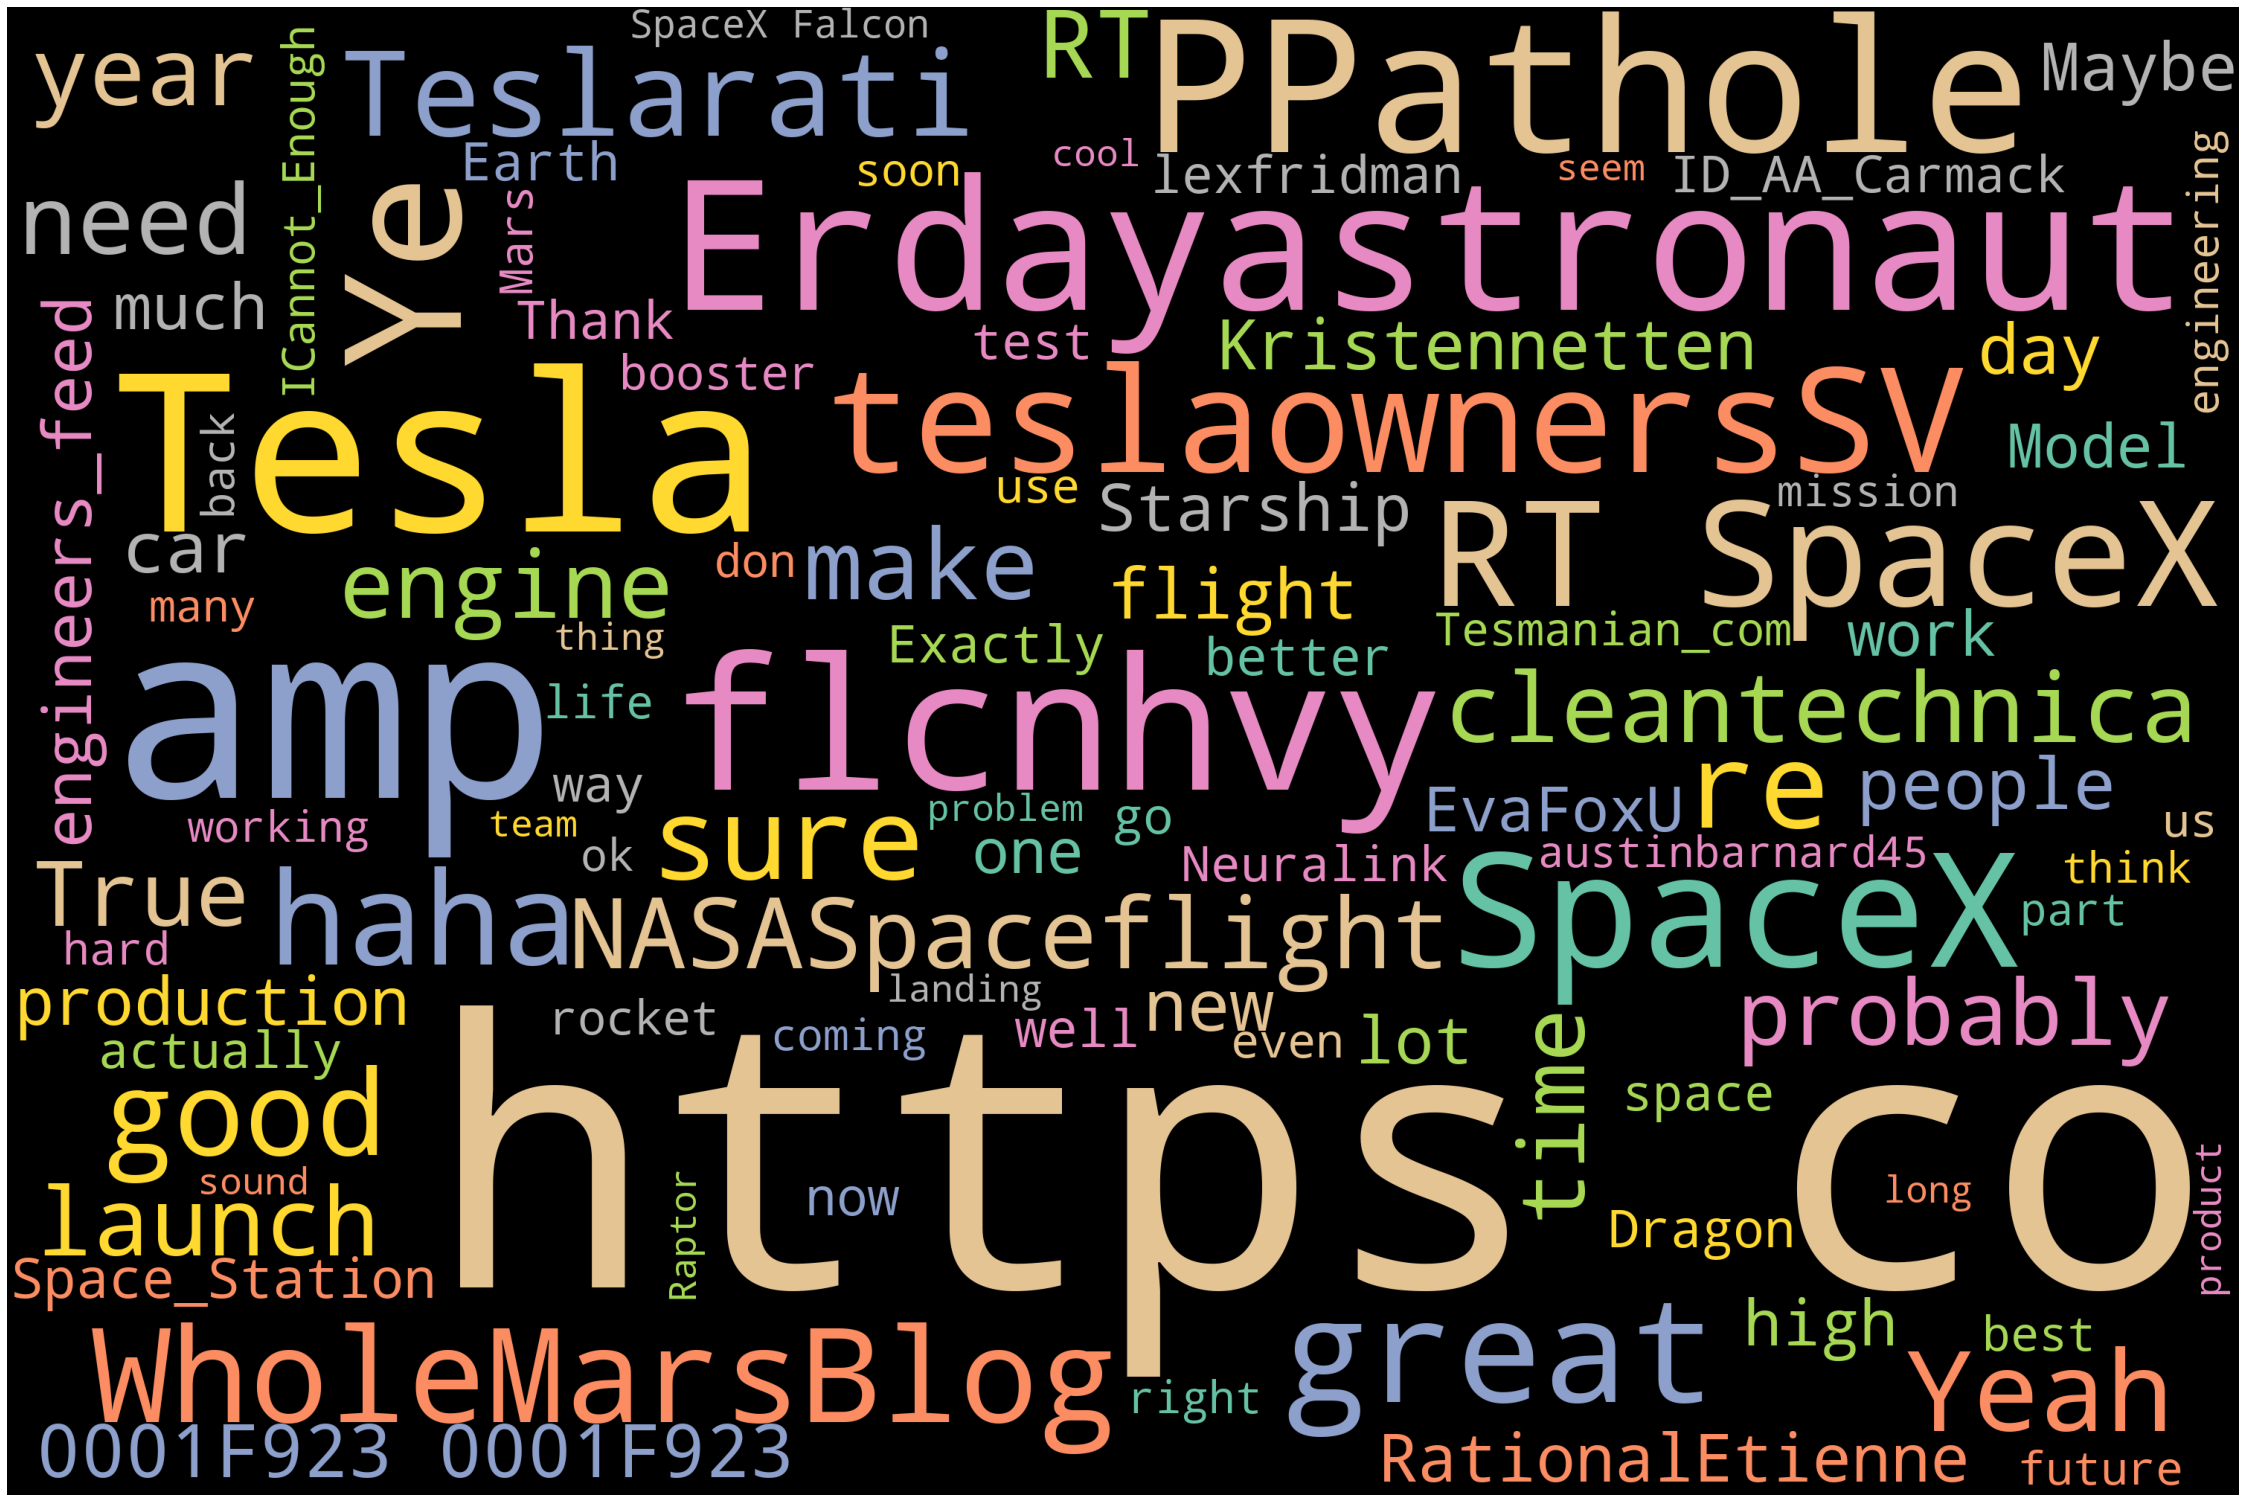

In [53]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [54]:
# Save image
#wordcloud.to_file("wordcloud.png")

In [3]:
import pandas as pd
afinn = pd.read_csv("Afinn.csv", sep = ',' , encoding = 'latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [4]:
affinity_score = afinn.set_index('word')['value'].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
import spacy

In [1]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_score

def calculate_sentiment(text:str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

NameError: name 'spacy' is not defined

In [2]:
calculate_sentiment(text = 'i am happy for the day')

NameError: name 'calculate_sentiment' is not defined

In [ ]:
sent_df['sentiment_value'] = sent_df['sentences'].apply(calculate_sentiment)

sent_df

In [ ]:
sent_df['Index'] = range(0,len(sent_df))
first_column = sent_df.pop('Index')
sent_df.insert(0, 'Index', first_column)

sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)

sent_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='Index',data=sent_df)

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')
